# Demo

In [1]:
from dust import *
from halo import *

E = 2.0
N_H = 1e22
theta = 10

In [2]:
silicate = Silicate()
graphite = Graphite()

In [3]:
graphite.henke_F(E)

array(1.05688992)

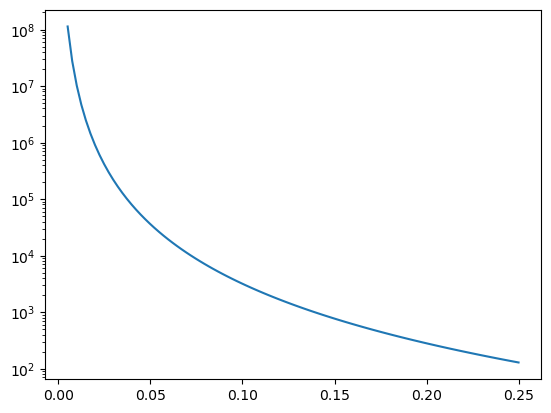

In [4]:
silicate.plot_size_func()

### Gauss RG

In [5]:
halo = Halo(N_H, E, [silicate,graphite])

In [6]:
halo.dsigma_dOmega(.1, silicate, 10)

np.float64(4.399997258919479e-12)

In [7]:
halo.dust_I(silicate, 20)

0.020377524283098854

In [8]:
halo.dust_I(graphite, 20)

0.008036214296955146

In [9]:
halo.I(10)

0.059653211555136414

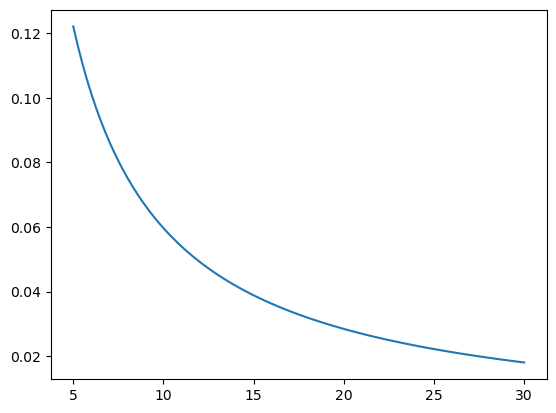

In [10]:
halo.plot_I()

### Exact RG

In [11]:
E=1
exact_halo = Halo(N_H, E, [silicate,graphite], scatter_model="ExactRG")

In [12]:
exact_halo.dsigma_dOmega(.1, silicate, 10)

np.float64(8.357142781496757e-12)

In [13]:
exact_halo.I(10)

0.11793034254005183

### Mie

In [14]:
E=1
mie_halo = Halo(N_H, E, [silicate,graphite], scatter_model="Mie")
mie_halo.I(10)

1.5392261223284882e-13

# Workspace

In [15]:
from astropy.io import fits
from astropy.table import Table

In [16]:
hdu = fits.open("dust_data/DsdO_3.30.fits")

In [17]:
hdu.info()

Filename: dust_data/DsdO_3.30.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  H             1 BinTableHDU     36   533664R x 4C   [1E, 1E, 1E, 1E]   


In [18]:
hdu1 = hdu[1]

In [19]:
hdu[1].columns

ColDefs(
    name = 'Energy'; format = '1E'; unit = 'keV'
    name = 'Size'; format = '1E'; unit = 'um'
    name = 'ThetaObs'; format = '1E'; unit = 'arcsec'
    name = 'Intensity'; format = '1E'; unit = 'cm^2 arcmin^-2'
)

In [20]:
df = Table(hdu1.data).to_pandas()
df

,Energy,Size,ThetaObs,Intensity
0,0.300,0.005,5.000000,6.285660e-26
1,0.300,0.005,5.269294,5.879412e-26
2,0.300,0.005,5.553093,5.502271e-26
3,0.300,0.005,5.852177,5.154870e-26
4,0.300,0.005,6.167368,4.840606e-26
...,...,...,...,...
533659,1.475,0.545,810.718628,3.165237e-28
533660,1.475,0.545,854.382996,2.619681e-28
533661,1.475,0.545,900.399109,2.353275e-28
533662,1.475,0.545,948.893677,1.780529e-28


In [21]:
df.iloc[abs(df["Energy"] - 1.25).argmin()]["Energy"]

np.float32(1.25)

In [22]:
mask = df["Energy"] >= 0
mask = mask & (df["Energy"] == 1)
mask

0         False
1         False
2         False
3         False
4         False
          ...  
533659    False
533660    False
533661    False
533662    False
533663    False
Name: Energy, Length: 533664, dtype: bool

In [23]:
df["Size"].min()

np.float32(0.005)

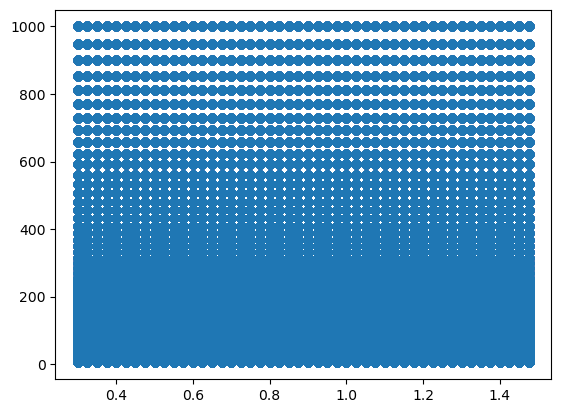

In [24]:
from matplotlib import pyplot as plt
plt.scatter(hdu1.data["Energy"],hdu1.data["ThetaObs"])